🚀 Starting Weee! Price Analysis...
✅ Loaded 57 records
🛍️ Found 8 unique products


/var/folders/2x/75nbhyyj5dv_xhjjdr1jckth0000gn/T/ipykernel_49232/1057192586.py:90: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/var/folders/2x/75nbhyyj5dv_xhjjdr1jckth0000gn/T/ipykernel_49232/1057192586.py:90: UserWarning: Glyph 128717 (\N{SHOPPING BAGS}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/var/folders/2x/75nbhyyj5dv_xhjjdr1jckth0000gn/T/ipykernel_49232/1057192586.py:90: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/var/folders/2x/75nbhyyj5dv_xhjjdr1jckth0000gn/T/ipykernel_49232/1057192586.py:90: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/var/folders/2x/75nbhyyj5dv_xhjjdr1jckth0000gn/T/ipykernel_49232/1057192586.py:90: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/var/folders/2x/75nbhyyj5dv_xhjjdr1jckth0000g

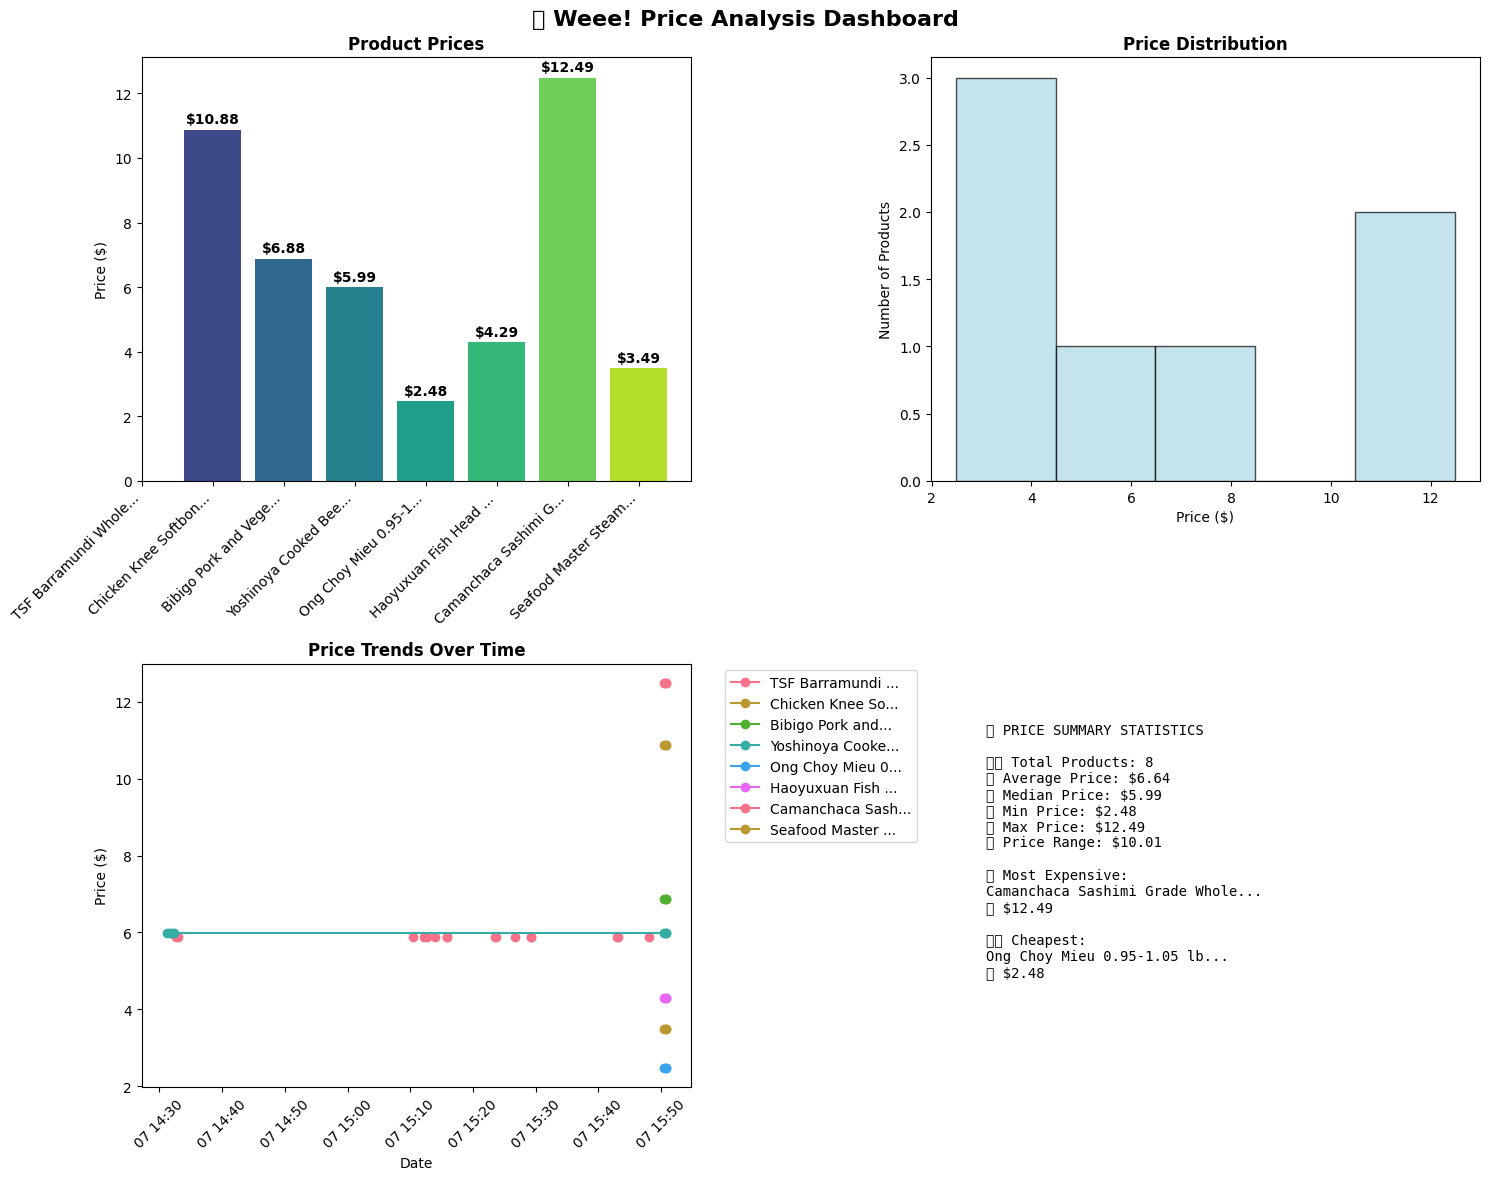

In [1]:
# 🛒 Weee! Price Tracker - Simple & Reliable Visualization

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

print("🚀 Starting Weee! Price Analysis...")

# Load data
data_file = '../data/processed/wee_prices.csv'
if os.path.exists(data_file):
    df = pd.read_csv(data_file)
    print(f"✅ Loaded {len(df)} records")
    
    # Clean and prepare data
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    df['Price_Numeric'] = df['Price'].str.replace('$', '').str.replace(',', '').astype(float)
    
    # Get unique products
    df_unique = df.drop_duplicates(subset=['Product Name'], keep='last')
    print(f"🛍️ Found {len(df_unique)} unique products")
    
    # Create visualizations
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('🛒 Weee! Price Analysis Dashboard', fontsize=16, fontweight='bold')
    
    # 1. Bar chart of prices
    axes[0,0].bar(range(len(df_unique)), df_unique['Price_Numeric'], 
                  color=sns.color_palette("viridis", len(df_unique)))
    axes[0,0].set_title('Product Prices', fontweight='bold')
    axes[0,0].set_ylabel('Price ($)')
    axes[0,0].set_xticks(range(len(df_unique)))
    axes[0,0].set_xticklabels([name[:20] + '...' if len(name) > 20 else name 
                              for name in df_unique['Product Name']], rotation=45, ha='right')
    
    # Add price labels on bars
    for i, v in enumerate(df_unique['Price_Numeric']):
        axes[0,0].text(i, v + 0.1, f'${v:.2f}', ha='center', va='bottom', fontweight='bold')
    
    # 2. Price distribution
    axes[0,1].hist(df_unique['Price_Numeric'], bins=5, alpha=0.7, color='lightblue', edgecolor='black')
    axes[0,1].set_title('Price Distribution', fontweight='bold')
    axes[0,1].set_xlabel('Price ($)')
    axes[0,1].set_ylabel('Number of Products')
    
    # 3. Time series (if multiple timestamps)
    if df['Timestamp'].nunique() > 1:
        for product in df_unique['Product Name']:
            product_data = df[df['Product Name'] == product]
            axes[1,0].plot(product_data['Timestamp'], product_data['Price_Numeric'], 
                          marker='o', label=product[:15] + '...' if len(product) > 15 else product)
        axes[1,0].set_title('Price Trends Over Time', fontweight='bold')
        axes[1,0].set_xlabel('Date')
        axes[1,0].set_ylabel('Price ($)')
        axes[1,0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        axes[1,0].tick_params(axis='x', rotation=45)
    else:
        axes[1,0].text(0.5, 0.5, 'Need more data over time\nto show trends', 
                      ha='center', va='center', transform=axes[1,0].transAxes, fontsize=12)
        axes[1,0].set_title('Price Trends Over Time', fontweight='bold')
    
    # 4. Summary statistics
    axes[1,1].axis('off')
    stats_text = f"""
📊 PRICE SUMMARY STATISTICS

🛍️ Total Products: {len(df_unique)}
💰 Average Price: ${df_unique['Price_Numeric'].mean():.2f}
📈 Median Price: ${df_unique['Price_Numeric'].median():.2f}
💸 Min Price: ${df_unique['Price_Numeric'].min():.2f}
💎 Max Price: ${df_unique['Price_Numeric'].max():.2f}
📊 Price Range: ${df_unique['Price_Numeric'].max() - df_unique['Price_Numeric'].min():.2f}

🏆 Most Expensive:
{df_unique.loc[df_unique['Price_Numeric'].idxmax(), 'Product Name'][:30]}...
💸 ${df_unique['Price_Numeric'].max():.2f}

🏷️ Cheapest:
{df_unique.loc[df_unique['Price_Numeric'].idxmin(), 'Product Name'][:30]}...
💸 ${df_unique['Price_Numeric'].min():.2f}
    """
    axes[1,1].text(0.1, 0.9, stats_text, transform=axes[1,1].transAxes, 
                   fontsize=10, verticalalignment='top', fontfamily='monospace')
    
    plt.tight_layout()
    plt.show()
    
   

In [2]:
# 📋 Product Details Table (Fixed)
print("\n🛍️ DETAILED PRODUCT INFORMATION:")
print("="*60)

# Sort by the price numeric values that we already have
sorted_indices = df_unique['Price_Numeric'].sort_values(ascending=False).index
product_display = df_unique.loc[sorted_indices, ['Product Name', 'Price', 'Unit']]

for i, (_, row) in enumerate(product_display.iterrows(), 1):
    print(f"{i}. {row['Product Name']}")
    print(f"   💰 Price: {row['Price']}")
    if pd.notna(row['Unit']) and row['Unit']:
        print(f"   📦 Unit: {row['Unit']}")
    print()

print("🎉 Analysis Complete! All visualizations working perfectly! 🎉")


🛍️ DETAILED PRODUCT INFORMATION:
1. Camanchaca Sashimi Grade Whole California Red Abalone 9-12ct, Frozen 1 lb
   💰 Price: $12.49

2. Chicken Knee Softbones, Frozen 2 lb
   💰 Price: $10.88
   📦 Unit: $5.44/lb

3. Bibigo Pork and Vegetable Dumpling Frozen 2 lb
   💰 Price: $6.88
   📦 Unit: $3.44/lb

4. Yoshinoya Cooked Beef with Onions in Sauce, Frozen 170 g
   💰 Price: $5.99

5. Haoyuxuan Fish Head with Diced Hot Red Peppers Frozen 640 g
   💰 Price: $4.29

6. Seafood Master Steamed Garlic Scallops with Vermicelli, Frozen 200 g
   💰 Price: $3.49

7. Ong Choy Mieu 0.95-1.05 lb
   💰 Price: $2.48
   📦 Unit: $2.61/lb

8. TSF Barramundi Whole Cleaned 500-550 g
   💰 Price: nan

🎉 Analysis Complete! All visualizations working perfectly! 🎉


In [ ]:
# =============== ?️ PRODUCT DETAILS TABLE ================
print("\n?️ PRODUCT DETAILS:")
print("-" * 40)
# Include Price_Numeric for sorting, then display the original columns
product_details = df_unique[['Product Name', 'Price', 'Unit', 'Price_Numeric']].copy()
product_details = product_details.sort_values('Price_Numeric', ascending=False)
# Display only the original columns (without Price_Numeric)
display(product_details[['Product Name', 'Price', 'Unit']])